<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/Confusion_matrix_included.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets as datasets
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense


In [3]:
num_classes = 10 
input_shape = (28, 28, 1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)


In [4]:
basic_model = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)


In [6]:
opt = keras.optimizers.Adam(learning_rate=0.01)
basic_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [7]:
basic_model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split= 0.1)

422/422 [==============================] - 48s 110ms/step - loss: 0.1776 - accuracy: 0.9445 - val_loss: 0.0510 - val_accuracy: 0.9848


In [8]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.0528 - accuracy: 0.9829
Loss =  0.052829254418611526
Accuracy =  0.9829000234603882


In [9]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

  







In [10]:
## calulate accuracy by hand
probs = basic_model.predict(X_test)
y_pred = (np.argmax(probs,axis=1)).astype('int')
y_true = (np.argmax(y_test,axis=1)).astype('int')

print(y_pred)
print(y_true)

def tot_acc(prediction, true_value):
	count= 0
	for i in range(len(y_true)):
		if y_pred[i] == y_true[i]:
			count = count +1
	acc= count/len(y_true)*100
	return print("Your total accuracy is :",acc,"%")


tot_acc(y_pred,y_true)

 


 
 

 





[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
Your total accuracy is : 98.29 %


In [11]:

def singular_acc(target_class):
  y_p = y_pred[y_pred == target_class] 
  y_t = y_true[y_true == target_class]
  count = 0
  if len(y_t) == len(y_p):
    for i in range(y_t):
      if y_p[i] == y_t[i]:
        count = count +1
  else:
    if len(y_p) > len(y_t):
      count=  -(len(y_p)-len(y_t))
      for i in range(len(y_t)):
        if y_p[i] == y_t[i]:
          count = count +1 
    elif len(y_p) < len(y_t):
      count = -(len(y_t)-len(y_p))
      for i in range(len(y_p)):
        if y_p[i] == y_t[i]:
          count = count +1 
  acc = count/len(y_t)*100




  return print(acc)
 

for i in range (10):
  singular_acc(i)








98.06122448979592
99.73568281938327
97.77131782945736
98.51485148514851
98.98167006109979
95.2914798206278
98.12108559498957
96.88715953307393
99.38398357289527
95.8374628344896


In [44]:
from sklearn import preprocessing
clf = preprocessing.LabelBinarizer()
clf.fit(y_pred)
clf.classes_
clf.transform(y_pred)
lb = clf.transform(y_pred).astype(float)
print(y_test)
print(lb)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [79]:
from numpy.core.numeric import count_nonzero
def accuracy_multi_class(true_value,Binary_value):
  c=[]
  for i in range(10):
   c.append(np.sum((y_test[:,i] == lb[:,i])/len(y_test)*100))
  return c
  
    

In [80]:
accuracy_multi_class(y_test,lb)

[99.71,
 99.85000000000001,
 99.54999999999998,
 99.63,
 99.78,
 99.63,
 99.75,
 99.5,
 99.65,
 99.53]

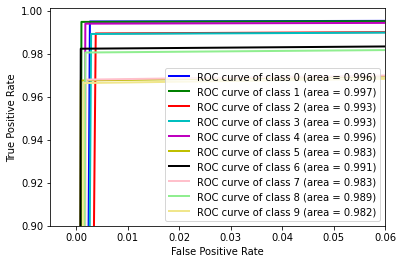

In [84]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], lb[:, i])
    roc_auc[i]        = auc(fpr[i], tpr[i])


colors = cycle(['b', 'g', 'r','c','m','y','k','pink', 'lightgreen','khaki'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim(-0.005, 0.06)
plt.ylim(0.9, 1.001)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_true, y_pred, normalize=None)

print(c_m)

[[ 975    0    2    0    0    0    2    1    0    0]
 [   0 1129    2    3    0    0    0    1    0    0]
 [   2    0 1021    0    3    0    0    4    2    0]
 [   0    0    4  999    0    1    0    4    2    0]
 [   0    0    1    0  976    0    0    0    0    5]
 [   4    0    1   14    0  863    4    1    4    1]
 [   9    3    0    0    2    2  941    0    1    0]
 [   1    2   19    3    1    0    0  995    3    4]
 [   4    0    4    2    3    0    2    1  955    3]
 [   4    4    1    4    7    5    0    5    4  975]]


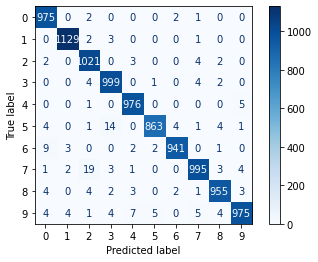

[99.48979592 99.47136564 98.93410853 98.91089109 99.38900204 96.74887892
 98.22546973 96.78988327 98.04928131 96.63032706]


In [17]:

from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
disp = ConfusionMatrixDisplay(confusion_matrix=c_m,
                             display_labels= '0123456789')
disp.plot(cmap= 'Blues')
plt.show()

matrix = (c_m.diagonal()/c_m.sum(axis=1))*100
print(matrix)

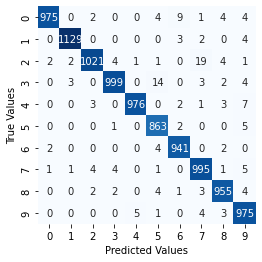

In [18]:
import seaborn as sns

sns.heatmap(c_m.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()